# CBE 162-Fall 2024 Lab 2

## Ordinary Differential equations


Here we will focus on using Python to numerically solve ODEs. There are many libraries for this purpose, but this tutorial will focus on the scipy module.

- See [https://docs.scipy.org/](https://docs.scipy.org/) for the full documentation on scipy and numpy.
- See [https://docs.scipy.org/doc/scipy/reference/integrate.html](https://docs.scipy.org/doc/scipy/reference/integrate.html) for info just relating to the integrate package in scipy.


Begin with importing numpy, matplotlib.pyplot, and the integrate package from scipy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## First order ODEs

Let's begin with a nonlinear, first order differential equation:

$\tau \dfrac{dy}{dt} = u - k\sqrt{y}$

Let's first define some of our inputs, then define a function for the model.

In [4]:
tau = 1.0
u = 1.5
k = 0.75
y_0 = 11

In [5]:
def modelfunction(t,y):
    return (u-k*(y**1))/tau 

See [https://matplotlib.org/stable/tutorials/index.html](https://matplotlib.org/stable/tutorials/index.html) for the documentation for matplot lib in order to create neater charts.

The solution.y variable has shape (n_variables, n_t), so when you unpack it, it automatically makes arrays of 1 less dimension for each "row". Here, that would be (n_t,).

The documentation for integrate.solve_ivp includes other optional arguments as well. You can specify a method of integration, such as method = RK45 for a an explicit 4th or Runge-Kutta method, method = DOP853 for an explicit 8th order Runge-Kutta method. There are several implicit methods as well.  

The integrate package has other modules that may be useful as well.
Note that solve_ivp requires the input function to have independent variable as the first argument.
The module is also smart enough to know how many time steps to put in, although you can define time steps if you wanted to. 

Next let's use some tools in numpy and scipy.integrate. Define an input vector for the independant variable, t. Then use tools available in scipy.integrate, such as the solve_ivp package. 

<class 'scipy.integrate._ivp.ivp.OdeResult'>


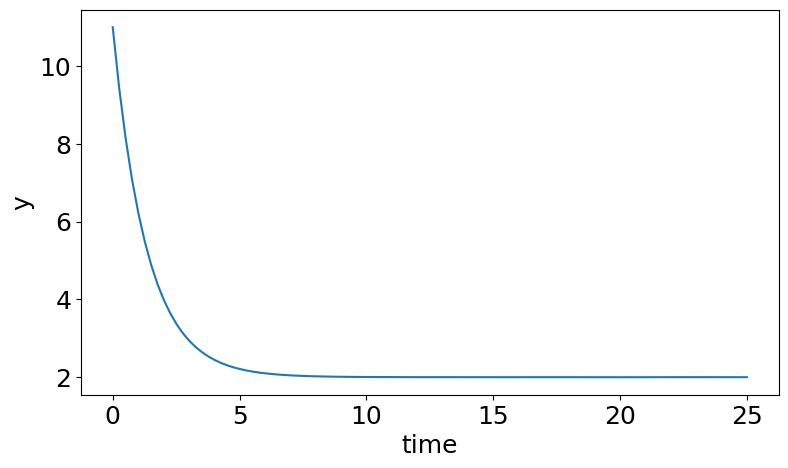

In [6]:
t_initial = 0
t_final = 25

t = np.linspace(t_initial, t_final, 100)

solution = integrate.solve_ivp(modelfunction, [t_initial, t_final], [y_0], t_eval = t) #t_eval is an optional argument

print(type(solution)) #What type of object does solve_ivp use?

t_axis = solution.t     #the .t is an argument to spit out the time input array
y = solution.y[0]       #the .y is an argument on the object that solve_ivp spits out. The [0] is needed or it's the wrong dimension for .plot

plt.figure(figsize=(9,5))
plt.rc("font", size = 18)
plt.plot(t_axis, y)
plt.xlabel('time')
plt.ylabel('y')
plt.show()


## Systems of ODEs

Imagine the following system of equations:

$(1)  \quad \dfrac{d y_1}{d t} = y_1 \cos{t} +y_2 \sin{t}$

$(2)  \quad \dfrac{d y_2}{d t} = my_1 +b$


Begin by defining inputs and the model function:

In [7]:
m = 3.5
b = -1.1
y1_0 = 4
y2_0 = 1

def model(t, y): #independant variable first, then dependant. Here y will be a vector.
    y_1, y_2 = y
    DE1 = y_1*np.cos(t)-y_2*np.sin(t)
    DE2 = m*y_1+b
    return DE1, DE2

Our function has 2 outputs now, and solve_ivp is capable of handling them so long as each ODE is explicit. We will plot $y_1$ and $y_2$ against time and $y_2$ against $y_1$

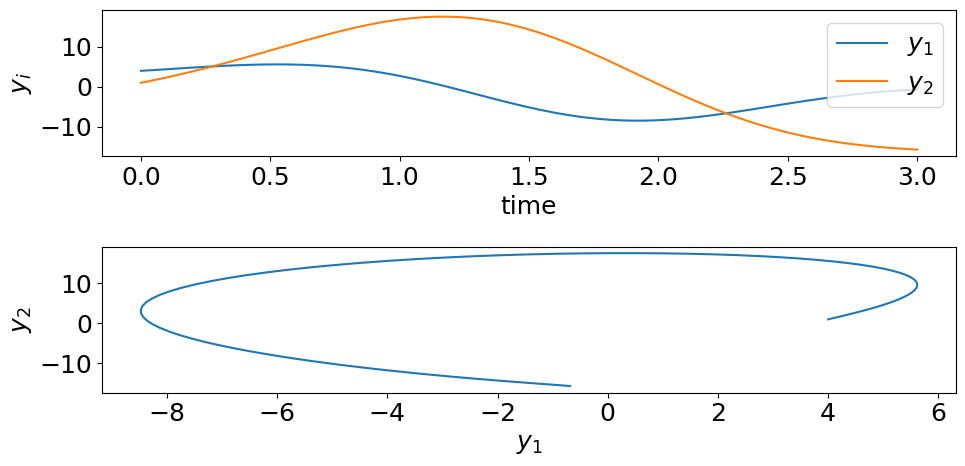

In [8]:
t_initial = 0
t_final = 3

t = np.linspace(t_initial, t_final, 100) #Recall with solve_ivp defining the domain's resolution is optional

sol = integrate.solve_ivp(model, (t_initial, t_final), (y1_0, y2_0), t_eval = t)

t = sol.t
y1, y2 = sol.y #have 2 outputs now, and the array is the right size. 

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
#
plt.plot(t,y1, label = '$y_1$')
plt.plot(t,y2, label = '$y_2$')
plt.legend(loc = "best")
plt.xlabel("time")
plt.ylabel('$y_i$')
#
plt.subplot(2,1,2)
plt.plot(y1,y2)
plt.xlabel("$y_1$")
plt.ylabel("$y_2$")
plt.tight_layout()
plt.show()

## Practice Problems



1. Consider a steady state plug flow reactor, with flow rate $F= 1 m^3/s$ , length $L=5 m$ and cross-sectional
area $A=1 m^2$. Consider a single step first-order, irreversible reaction :

 $$A→B$$

Consider the initial concentration of $A$ to be $1 M$  at the inlet. Perform a component balance over a differential element $dx$ along the reactor. Assume $k=1 s^{-1}$ to be
the rate constant for the reaction. Now, could you frame a first-order differential equation from
this balance? Solve it and plot the concentration profile of A and B along the x direction. Your
answer can only include the code used for this question.

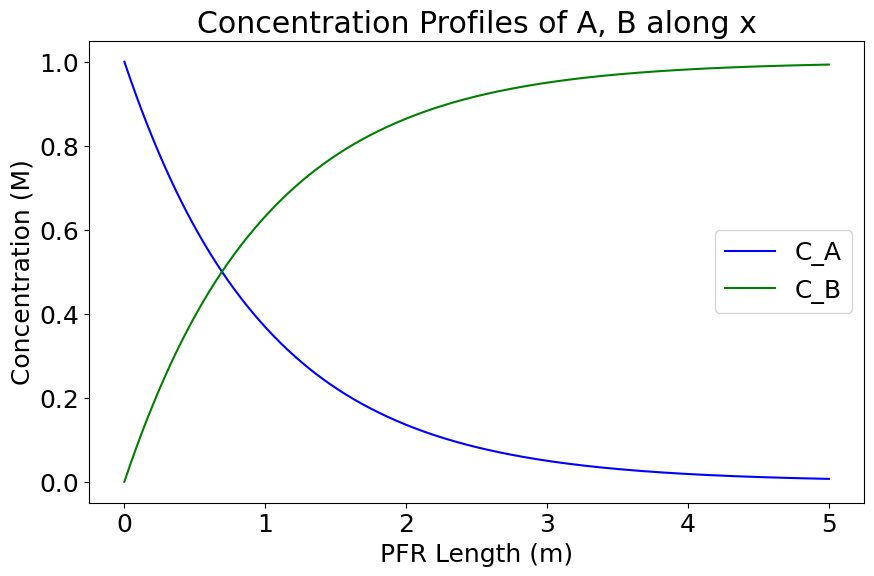

In [11]:
F = 1 # m^3/s
L = 5 # m
A = 1 # m^2
k = 1 # s^-1
C_A0 = 1 # M

v = F / A # m^3/s / m^2 = m/s

def model(x, C_A=1):
    return -(k / v) * C_A

x_span = [0, L]
sol = integrate.solve_ivp(model, x_span, [C_A0], t_eval = np.linspace(0, L, 1000))
C_A = sol.y[0]
C_B = C_A0 - C_A

plt.figure(figsize=(10,6))
plt.plot(sol.t, C_A, label='C_A', color='blue')
plt.plot(sol.t, C_B, label='C_B', color='green')
plt.xlabel('PFR Length (m)')
plt.ylabel('Concentration (M)')
plt.title('Concentration Profiles of A, B along x')
plt.legend()
plt.show()

2. In a well-mixed batch reactor, two irreversible reactions occur in unison:
$$A→B$$
$$B→C$$
The volume of this reactor is $3 m^3$. The initial concentration of A is $2M$. Consider a differential time interval $d t$. Frame differential equations for the concentrations of A,
B, and C by considering a balance over time $d t$. The rate constant for the formation of B is $k_1=1.5 s^{-1}$,
and for the degeneration of B to C is $k_2=2 s^{-1}$. Solve these differential equations and plot the
concentrations of all components against time.  Repeat this process, except this time make the value of $k_2=150 s^{-1}$. Write your observations as a comment at the end of your code.

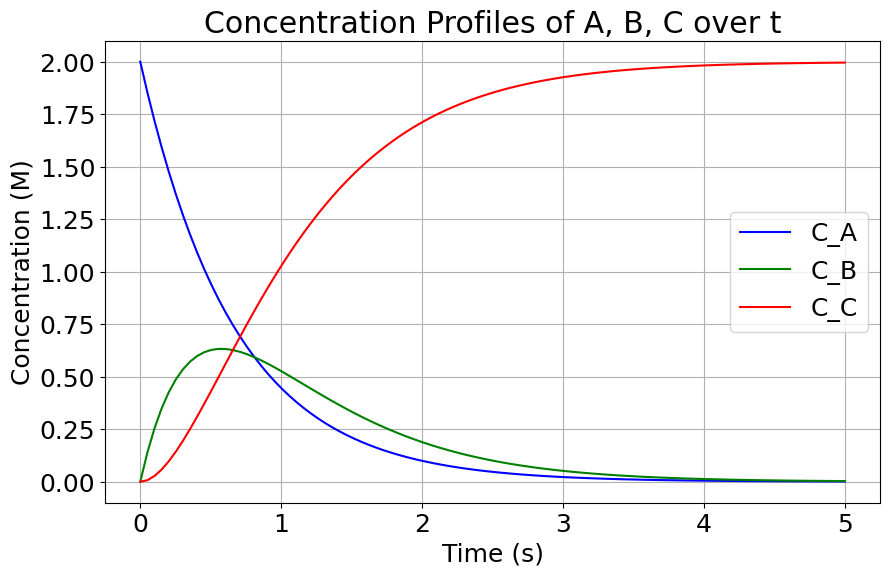

In [18]:
k1 = 1.5   # s^-1
k2 = 2.0   # s^-1
C_A0 = 2.0  # M
C_B0 = 0.0  # M
C_C0 = 0.0  # M

def reaction_system(t, y):
    C_A, C_B, C_C = y
    dC_A_dt = -k1 * C_A
    dC_B_dt = k1 * C_A - k2 * C_B
    dC_C_dt = k2 * C_B
    return [dC_A_dt, dC_B_dt, dC_C_dt]

t_span = [0, 5]
t_eval = np.linspace(0, 5, 100)

initial_conditions = [C_A0, C_B0, C_C0]

sol = integrate.solve_ivp(reaction_system, t_span, initial_conditions, t_eval=t_eval)

C_A = sol.y[0]
C_B = sol.y[1]
C_C = sol.y[2]

plt.figure(figsize=(10,6))
plt.plot(sol.t, C_A, label='C_A', color='blue')
plt.plot(sol.t, C_B, label='C_B', color='green')
plt.plot(sol.t, C_C, label='C_C', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title('Concentration Profiles of A, B, C over t')
plt.legend()
plt.grid(True)
plt.show()

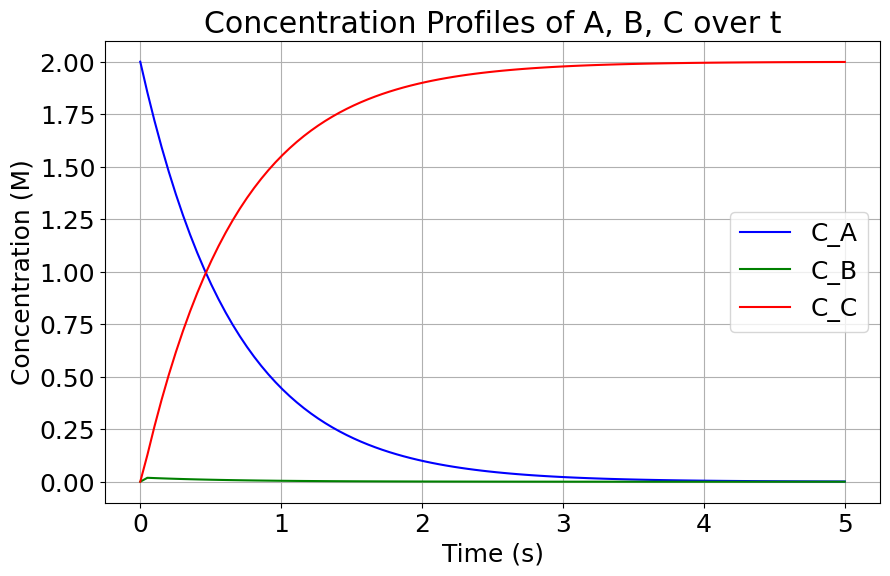

In [17]:
k2_new = 150.0

def reaction_system_new(t, y):
    C_A, C_B, C_C = y
    dC_A_dt = -k1 * C_A
    dC_B_dt = k1 * C_A - k2_new * C_B
    dC_C_dt = k2_new * C_B
    return [dC_A_dt, dC_B_dt, dC_C_dt]

sol_new = integrate.solve_ivp(reaction_system_new, t_span, initial_conditions, t_eval=t_eval)

C_A_new = sol_new.y[0]
C_B_new = sol_new.y[1]
C_C_new = sol_new.y[2]

plt.figure(figsize=(10,6))
plt.plot(sol_new.t, C_A_new, label='C_A', color='blue')
plt.plot(sol_new.t, C_B_new, label='C_B', color='green')
plt.plot(sol_new.t, C_C_new, label='C_C', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.title('Concentration Profiles of A, B, C over t')
plt.legend()
plt.grid(True)
plt.show()
